dependencies

In [135]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [137]:
df = pd.read_csv('/Users/lennox/Documents/machineLearning/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [139]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Column Descriptions

- **customerID**: A unique identifier assigned to each customer.
  
- **gender**: The gender of the customer in this case Male or Female.
  
- **SeniorCitizen**: Indicates whether the customer is a senior citizen.
  
- **Partner**: Indicates if the customer has a partner.
  
- **Dependents**: Indicates if the customer has dependents.
  
- **tenure**: The number of months the customer has been with the company.
  
- **PhoneService**: Indicates if the customer has a phone service.
  
- **MultipleLines**: Indicates if the customer has multiple phone lines (Yes/No/No phone service).
  
- **InternetService**: The type of internet service the customer has (DSL, Fiber optic, No internet service).
  
- **OnlineSecurity**: Indicates if the customer has online security services (Yes/No/No internet service).
  
- **OnlineBackup**: Indicates if the customer has online backup services (Yes/No/No internet service).
  
- **DeviceProtection**: Indicates if the customer has device protection services (Yes/No/No internet service).
  
- **TechSupport**: Indicates if the customer has technical support services (Yes/No/No internet service).
  
- **StreamingTV**: Indicates if the customer has streaming TV services (Yes/No/No internet service).
  
- **StreamingMovies**: Indicates if the customer has streaming movie services (Yes/No/No internet service).
  
- **Contract**: The type of contract the customer has (Month-to-month, One year, Two year).
  
- **PaperlessBilling**: Indicates if the customer has opted for paperless billing.
  
- **PaymentMethod**: The payment method used by the customer.
  
- **MonthlyCharges**: The amount charged to the customer each month.
  
- **TotalCharges**: The total amount charged to the customer over their tenure.
  
- **Churn**: Indicates if the customer has churned.


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [144]:
duplicate_rows = df.duplicated()
print(df[duplicate_rows])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [146]:
unique_genders = df['gender'].unique()
print(unique_genders)

['Female' 'Male']


In [148]:
unique_genders = df['SeniorCitizen'].unique()
print(unique_genders)

[0 1]


In [150]:
unique_genders = df['Partner'].unique()
print(unique_genders)

['Yes' 'No']


In [152]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
print(df['Partner'].head())

0    1
1    0
2    0
3    0
4    0
Name: Partner, dtype: int64


In [154]:
unique_genders = df['Dependents'].unique()
print(unique_genders)

['No' 'Yes']


In [156]:
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
print(df['Dependents'].head())

0    0
1    0
2    0
3    0
4    0
Name: Dependents, dtype: int64


In [158]:
unique_genders = df['PhoneService'].unique()
print(unique_genders)

['No' 'Yes']


In [160]:
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No':0})
print(df['PhoneService'].head())

0    0
1    1
2    1
3    0
4    1
Name: PhoneService, dtype: int64


In [162]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [164]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [166]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [168]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [170]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [172]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [174]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [176]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [178]:
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
print(df['PaperlessBilling'])

0       1
1       0
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    1
7041    1
7042    1
Name: PaperlessBilling, Length: 7043, dtype: int64


In [180]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [182]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(df['Churn'])

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [184]:
print(df)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG  Female              0        1           0       1   
1     5575-GNVDE    Male              0        0           0      34   
2     3668-QPYBK    Male              0        0           0       2   
3     7795-CFOCW    Male              0        0           0      45   
4     9237-HQITU  Female              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB    Male              0        1           1      24   
7039  2234-XADUH  Female              0        1           1      72   
7040  4801-JZAZL  Female              0        1           1      11   
7041  8361-LTMKD    Male              1        1           0       4   
7042  3186-AJIEK    Male              0        0           0      66   

      PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0                0  No phone service             DSL       

### When to Use Linear Regression:
- **Relationship is Linear**: When the relationship between the independent variables and the dependent variable is approximately linear.
- **Continuous Dependent Variable**: When the dependent variable is continuous and numeric.
- **Predicting a Single Outcome**: When predicting one outcome rather than multiple categories or labels.
- **Simple and Interpretable Model**: When you need a simple, interpretable model for small datasets or quick insights.
- **No or Little Multicollinearity**: When independent variables are not highly correlated with each other.

### When Not to Use Linear Regression:
- **Non-Linear Relationship**: When the relationship between the independent and dependent variables is not linear.
- **Categorical Dependent Variable**: When the dependent variable is categorical (use classification models instead).
- **Significant Outliers**: When there are many outliers in the dataset, as they can heavily influence the model.
- **High Multicollinearity**: When independent variables are highly correlated, which can distort results.
- **Complex Relationships**: When the relationships are too complex for a linear model (consider non-linear models like decision trees or neural networks).


In [191]:
# Select relevant features and the target
X = df[['tenure', 'Partner', 'Dependents', 'InternetService', 'Contract', 
        'PaperlessBilling', 'PaymentMethod', 'TechSupport', 'StreamingTV', 
        'StreamingMovies', 'DeviceProtection']]
y = df['MonthlyCharges']

# Convert categorical columns to numerical (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
#  magnitude of error in the original units (dollars).
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")



Mean Squared Error: 47.204160514113944
Root Mean Squared Error: 6.870528401375977


Mean Squared Error: 47.204160514113944
Root Mean Squared Error: 6.870528401375977


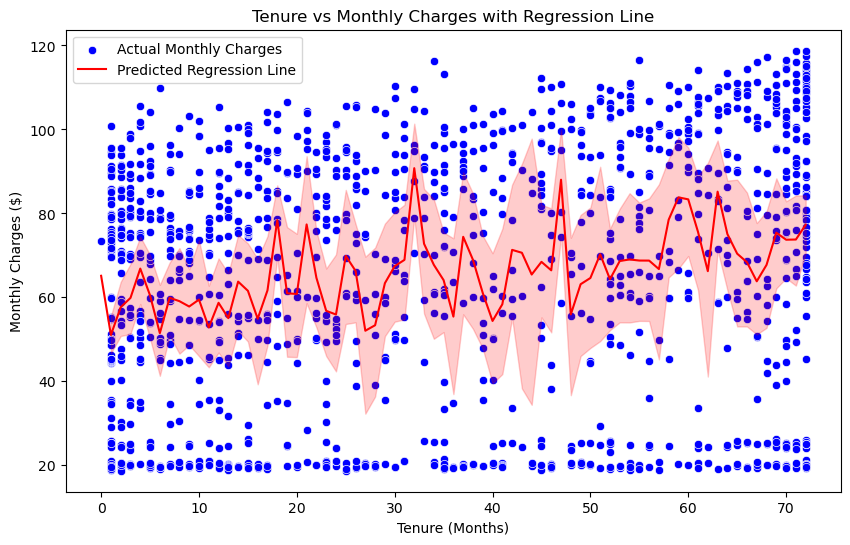

In [195]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the relevant data

# Select relevant features and the target
X = df[['tenure', 'Partner', 'Dependents', 'InternetService', 'Contract', 
        'PaperlessBilling', 'PaymentMethod', 'TechSupport', 'StreamingTV', 
        'StreamingMovies', 'DeviceProtection']]
y = df['MonthlyCharges']

# Convert categorical columns to numerical (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate RMSE to get the magnitude of error in the original units (dollars)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['tenure'], y=y_test, label='Actual Monthly Charges', color='blue')
sns.lineplot(x=X_test['tenure'], y=y_pred, color='red', label='Predicted Regression Line')
plt.title('Tenure vs Monthly Charges with Regression Line')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges ($)')
plt.legend()
plt.show()
